# Human Action Recognition_CNN

## Importing Library

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

## Preparing the Dataset

In [22]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Human Action Recognition\\DataSet\\Human Action Recognition\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Human Action Recognition\\DataSet\\Human Action Recognition\\test'

In [23]:
Data_Gen=ImageDataGenerator(rescale=1/255,validation_split=0.25)

In [24]:
train_df=pd.read_csv('Training_set.csv')
test_df=pd.read_csv('Testing_set.csv')

In [25]:
train_df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [26]:
test_df.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [27]:
train_itt=Data_Gen.flow_from_dataframe(train_df,directory=train_dir,x_col='filename',
                                       y_col='label',target_size=(100, 100),batch_size=64,subset='training')
test_itt=Data_Gen.flow_from_dataframe(train_df,directory=train_dir,x_col='filename',
                                       y_col='label',target_size=(100, 100),batch_size=64,subset='validation')

Found 9450 validated image filenames belonging to 15 classes.
Found 3150 validated image filenames belonging to 15 classes.


## Model Preparation

In [28]:
model= Sequential()

In [30]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(15,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_itt,validation_data=test_itt,epochs=8)

Epoch 1/8
148/148 [==============================] - 664s 4s/step - loss: 2.5033 - accuracy: 0.1666 - val_loss: 2.3848 - val_accuracy: 0.2181
Epoch 2/8
148/148 [==============================] - 207s 1s/step - loss: 2.1756 - accuracy: 0.2919 - val_loss: 2.1075 - val_accuracy: 0.3197
Epoch 3/8
148/148 [==============================] - 210s 1s/step - loss: 1.9209 - accuracy: 0.3843 - val_loss: 2.1043 - val_accuracy: 0.3244
Epoch 4/8
148/148 [==============================] - 209s 1s/step - loss: 1.6056 - accuracy: 0.4850 - val_loss: 2.1159 - val_accuracy: 0.3343
Epoch 5/8
148/148 [==============================] - 196s 1s/step - loss: 1.1981 - accuracy: 0.6123 - val_loss: 2.2921 - val_accuracy: 0.3451
Epoch 6/8
148/148 [==============================] - 210s 1s/step - loss: 0.7197 - accuracy: 0.7704 - val_loss: 2.8203 - val_accuracy: 0.3460
Epoch 7/8
148/148 [==============================] - 214s 1s/step - loss: 0.3121 - accuracy: 0.9050 - val_loss: 3.5108 - val_accuracy: 0.3419
Epoch 

In [32]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

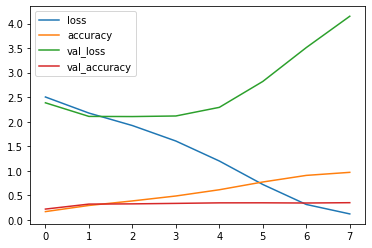

In [33]:
losses.plot()

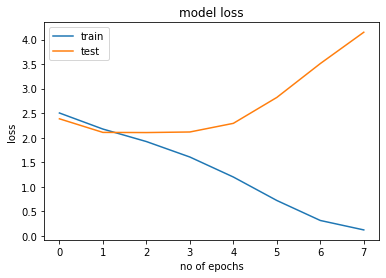

In [34]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

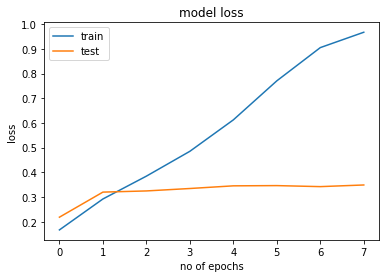

In [35]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()